In diesem Workbook plotten wir die Log Odds der Attribution Methoden

# Integrated Gradients

Zero Baseline

100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


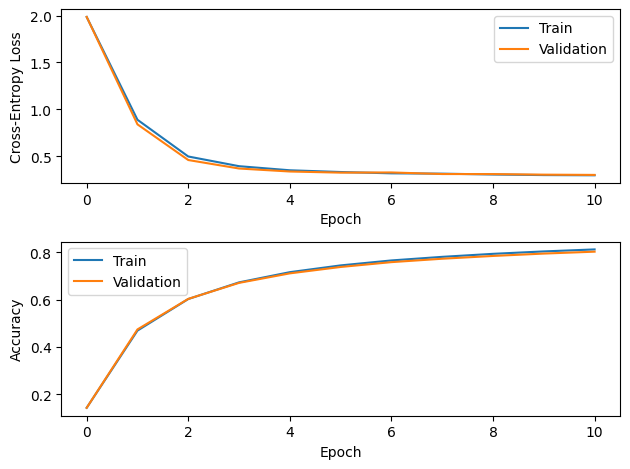

  0%|          | 0/1362 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 1362/1362 [00:03<00:00, 370.25it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


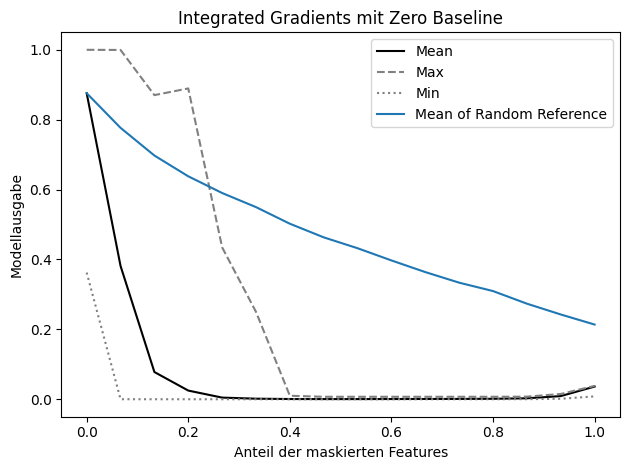

In [2]:
from model.training import train_model_and_visualize
import torch
from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods.integrated_gradients import IntegratedGradients

model = train_model_and_visualize([8])

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)
test_dataset = DryBean(DatasetMode.TEST)
am_eval = AttributionMethodsEvaluator(model=model)
zero_baseline = torch.zeros(16)

am_eval.visualize_log_odds_of_dataset(test_dataset,ig.attribute, title="Integrated Gradients mit Zero Baseline", apply_log=False,masking_baseline=zero_baseline,attribution_baseline = zero_baseline)

Uniform Output Baseline

100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


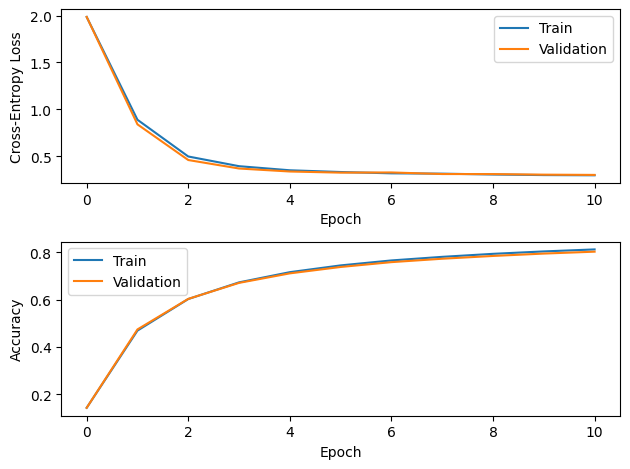

  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:12<00:00, 23.98it/s]
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


autobaseline: tensor([ 0.0072,  0.0059,  0.0060,  0.0057,  0.0092, -0.1650,  0.0077,  0.0086,
         0.0079,  0.0079,  0.0049,  0.0071, -0.0595,  0.0090,  0.0076,  0.0061],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2291, 0.0127, 0.1070, 0.1454, 0.1424, 0.0913, 0.2721])


100%|██████████| 1362/1362 [00:04<00:00, 333.65it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


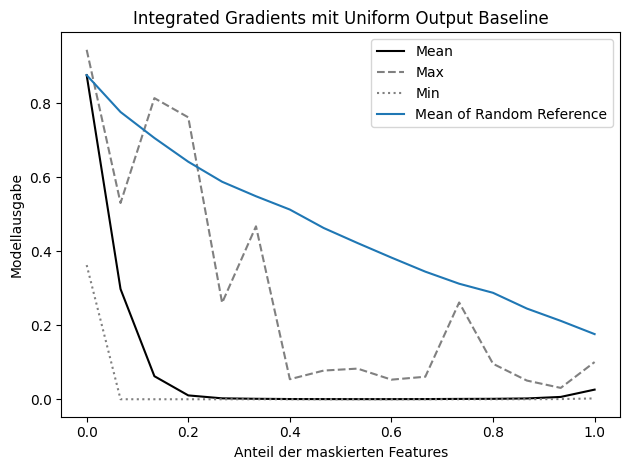

In [1]:
from model.training import train_model_and_visualize
from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods.integrated_gradients import IntegratedGradients
from model.training import train_autobaseline

model = train_model_and_visualize([8])

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)
test_dataset = DryBean(DatasetMode.TEST)
am_eval = AttributionMethodsEvaluator(model=model)
uniform_output_baseline = train_autobaseline(model)

am_eval.visualize_log_odds_of_dataset(test_dataset,ig.attribute, title="Integrated Gradients mit Uniform Output Baseline", apply_log=False,masking_baseline=uniform_output_baseline,attribution_baseline = uniform_output_baseline)

balanced uniform baseline

100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


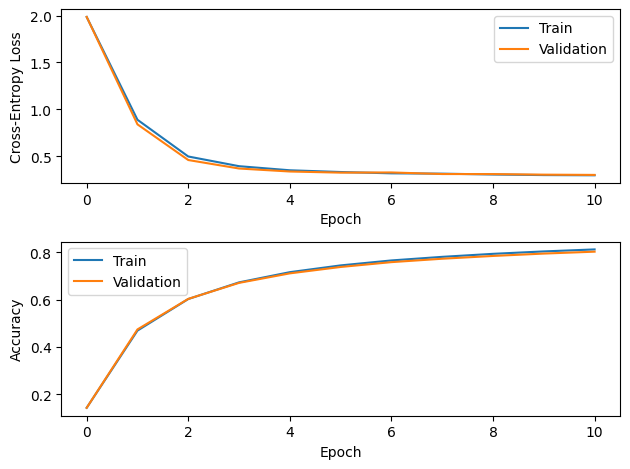

  0%|          | 0/1362 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 1362/1362 [00:03<00:00, 382.19it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


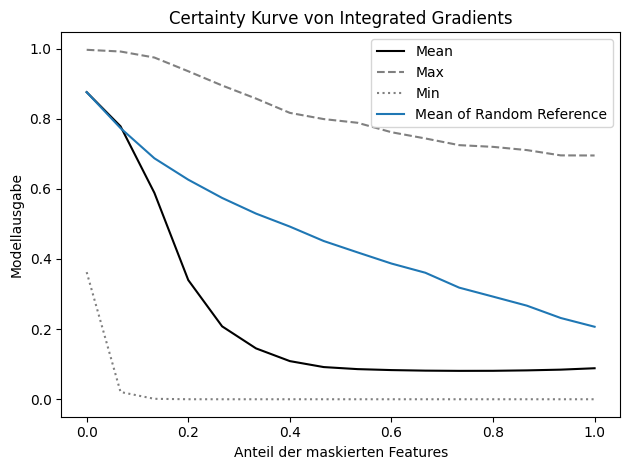

In [ ]:
from model.training import train_model_and_visualize

model = train_model_and_visualize([8])

from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods.integrated_gradients import IntegratedGradients
from model.util.baseline_generator import generate_balanced_uniform_baseline

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)

test_dataset = DryBean(DatasetMode.TEST)

am_eval = AttributionMethodsEvaluator(model=model)

baseline = generate_balanced_uniform_baseline(50)

am_eval.visualize_log_odds_of_dataset(test_dataset,ig.attribute, apply_log=False,baseline=baseline)